# Credit Scoring: Case Study
Credit scoring aims to determine the creditworthiness of individuals based on their credit profiles. By analyzing factors such as payment history, credit utilization ratio, and number of credit accounts, we can assign a credit score to each individual, providing a quantitative measure of their creditworthiness.

The given dataset includes features such as age, gender, marital status, education level, employment status, credit utilization ratio, payment history, number of credit accounts, loan amount, interest rate, loan term, type of loan, and income level.

Your task is to calculate credit scores and segment customers based on their credit scores to gain insights into different customer groups.

## Data Preprocessing
Let’s get started with the task of Credit Scoring and Segment customers by importing the necessary libraries and check the dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [39]:
df = pd.read_csv("credit_scoring.csv")
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


We have the description of all the attributes in the data:

1. Age: Numeric, ages of individuals.
2. Gender: Categorical, with male and female categories.
3. Marital Status: Categorical, indicating marital status.
4. Education Level: Categorical, representing the level of education.
5. Employment Status: Categorical, indicating employment status.
6. Credit Utilization Ratio: Numeric, ratio indicating the extent of credit usage.
7.  Payment History: Numeric, could indicate credit payment history in days or score.
8. Number of Credit Accounts: Numeric, number of credit-related accounts.
9.  Loan Amount: Numeric, amount of loan in the currency (the histogram you provided earlier corresponds to this variable).
10. Interest Rate: Numeric, interest rate associated with the loan.
11. Loan Term: Numeric, duration of the loan term.
12. Type of Loan: Categorical, indicating the type of loan.

In [10]:
# Check column insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [11]:
# Check the descriptive statistics
df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


##  Exploratory Data Analysis

### Create box plot showing the distribution of the Credit Utilization Ratio. 
- A median around 0.5 could indicate a balanced use of credit

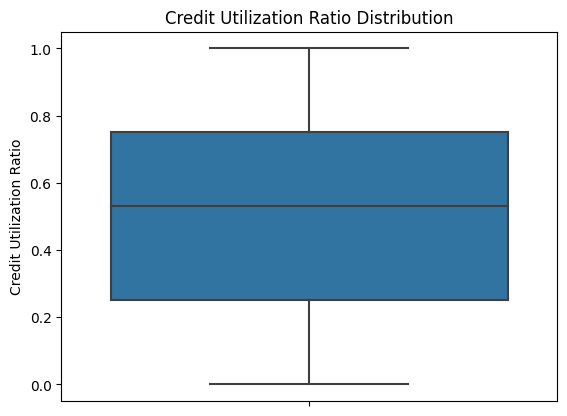

In [20]:
sns.boxplot(df, y=df["Credit Utilization Ratio"])
plt.title("Credit Utilization Ratio Distribution")
plt.show()

### Create histogram showing the distribution of the Loan Amount.

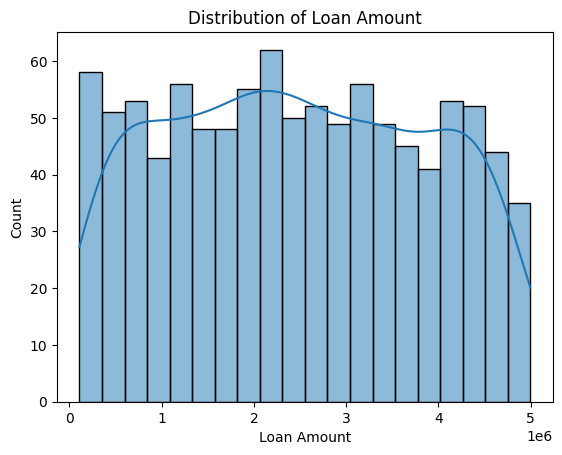

In [53]:
sns.histplot(df['Loan Amount'], bins=20, kde=True)
plt.title("Distribution of Loan Amount")
plt.show()

- The histogram appears to be uniformly distributed with some variations, lacking a strong central peak, and not skewed significantly to the left or right, implying a fairly even spread of loan amounts across the dataset.

- There are more loans in the middle range (around 1 to 3 million) compared to the others


### Create correlation heatmap 


In [34]:
# Define numeric columns for heatmap
numeric_df = df[['Credit Utilization Ratio', 
                   'Payment History', 
                   'Number of Credit Accounts', 
                   'Loan Amount', 'Interest Rate', 
                   'Loan Term']]
corr_matrix = numeric_df.corr()
corr_matrix

,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
Credit Utilization Ratio,1.000000,0.002114,-0.001842,-0.014918,0.048237,-0.022924
Payment History,0.002114,1.000000,0.025022,-0.019084,-0.017618,-0.045532
Number of Credit Accounts,-0.001842,0.025022,1.000000,0.032232,-0.001083,0.012794
Loan Amount,-0.014918,-0.019084,0.032232,1.000000,0.045288,0.014283
Interest Rate,0.048237,-0.017618,-0.001083,0.045288,1.000000,0.028190
Loan Term,-0.022924,-0.045532,0.012794,0.014283,0.028190,1.000000


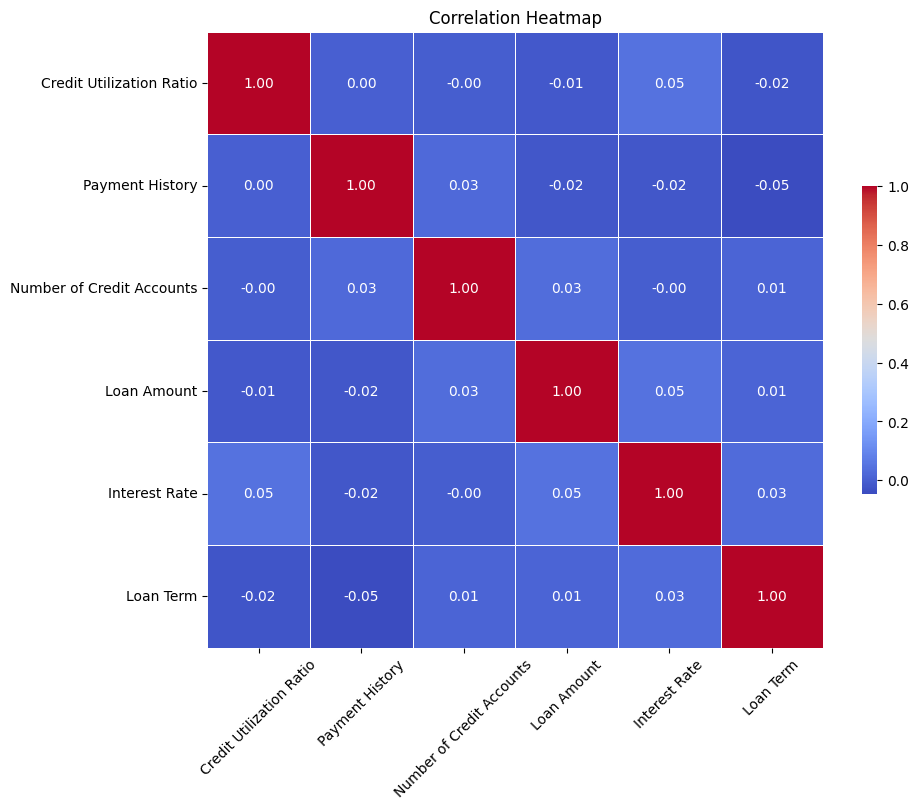

In [64]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

- Most variables show very low correlation coefficients with each other, as indicated by values close to 0. This suggests there are no strong linear relationships between these features.

- Also, there are no highly correlated pairs with a coefficient close to 1 or -1, which suggests that there is no redundancy among the features, and each provides unique information

## Calculating Credit Scores
### Implemented the FICO score method to calculate credit scores:

The FICO formula incorporates the weighted values of the features:
1. 35% weight for “Payment History”, 
2. 30% weight for “Credit Utilization Ratio”, 
3. 15% weight for “Number of Credit Accounts”, 
4. 10% weight for “Education Level”, 
5. 10% weight for “Employment Status”. 

In [65]:
# Define the mapping for categorical features
edu_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employ_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}
# Apply mapping to categorical features
df['Education Level'] = df['Education Level'].map(edu_level_mapping)
df['Employment Status'] = df['Employment Status'].map(employ_status_mapping)

In [66]:
# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in df.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']
    
    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

df['Credit Score'] = credit_scores
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797


## Segmentation Based on Credit Scores
Derived the KMeans clustering algorithm to segment customers based on their credit scores

In [67]:
from sklearn.cluster import KMeans

X = df[['Credit Score']]
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
df['Segment'] = kmeans.labels_

In [68]:
df['Segment'] = df['Segment'].map({ 0: 'Low',
                                    1: 'Good',
                                    2: 'Very Low',
                                    3: "Excellent"})

# Convert the 'Segment' column to category data type
df['Segment'] = df['Segment'].astype('category')

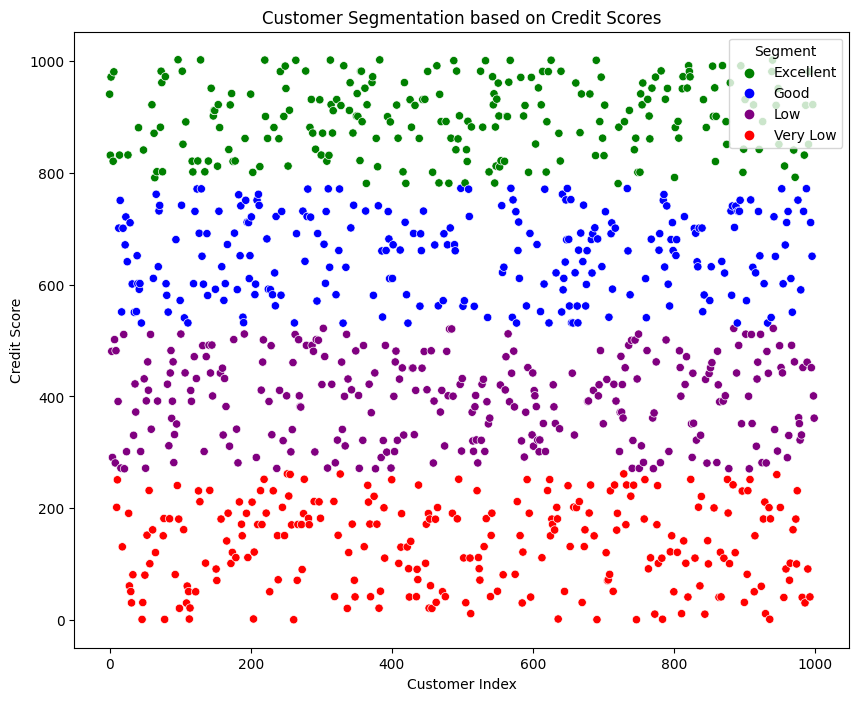

In [73]:
# Perform credit scoring and segmentation
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df.index, y=df['Credit Score'], hue=df['Segment'], 
                palette=['green', 'blue', 'purple', 'red'])
plt.title('Customer Segmentation based on Credit Scores')
plt.xlabel('Customer Index')
plt.ylabel('Credit Score')
plt.show()
